In [ ]:
#!pip install statsmodels --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Autoregression (AR)

Autoregressionsmethode (AR) modelliert den nächsten Schritt in der Sequence als eine lineare Funktion der Beobachtungen in den früheren Zeitschritten 

Die Notation des Modells beinhaltet die Angabe der Ordnung des Modells p als Parameter der AR-Funktion, z.B. AR(p). --> AR(1) ist eine Autoregressionsmodell erster Ordnung 

Diese Methode ist für univariate Zeitreihen ohne Trend und saisonale Komponenten geeignet

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# Konstruierter Datensatz
data = [x + random() for x in range(1, 100)]

model = AutoReg(data, lags=1)
model_fit = model.fit()

# Vorhersage machen
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.25780491]


# Moving Average (MA)

Die Methode modelliert den nächsten Schritt in der Sequenz als eine lineare Funktion der RSE (Residual Standard Error) eines mittleren Prozesses bei früheren Zeitschritten 

Die Notation des Modells beinhaltet die Angabe der Ordnung des Modells q als Parameter der MA-Funktion, z.B. MA(q). MA(1) wäre ein Modell moving average erster Ordnung

Die Methode ist für univariate Zeitreihen ohne Trend und saisonale Komponenten geeignet 

In [ ]:
# MA beispiel
from statsmodels.tsa.arima.model import ARIMA
from random import random

data = [x + random() for x in range(1, 100)]

model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()

yhat = model_fit.predict(len(data), len(data))
print(yhat)

[71.62144369]


# Autoregressive Moving Average (ARMA)

Autoregressive Modelle der gleitenden Mittel sind lineare zeitdiskrete Modelle. Modelliert den nächsten Schritt in der Sequenz als lineare Funktion der Beobachtungen 

Werden in BOX-JENKINS-METHODE behandelt.

Als wichtigste Anwendung gilt die "kurzfristige Vorhersage" 

Die Notation des Modells beinhaltet die Angabe der Reihenfolge für die AR(p) - und ARMA(p,q). Ein ARIMA-Modell kann verwendet werden, um AR- oder MA-Modelle zu entwickeln 

Die Methode ist für univariate Zeitreihen ohne Trend und saisonalen Komponenten geeignet

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.51023099]


# Autoregressive Integrated Moving Average (ARIMA)

In ARIMA Modelle werden autoregressive Prozesse mit Moving Average (MA)- Prozessen kombiniert. Autoregressive (AR)- Modelle führen Beobachtungen zum Zeitpunkt nur auf die vergangenen Beobachtungen zurück. 

Modellklasse, die den autoregressiven Teil und den gleitenden Mittelwertbeitrag des ARMA Modells um die Differenzierung und Integration (I) zur Trendbeseitigung und Herstellung der Stationarität erweitert

Die Notation des Models beinhaltet die Angabe der Reihenfolge für die Modelle AR(p), I(d) und MA(q) als Parameter für eine ARIMA Funktion, z.B. ARIMA(p,d,q). Ein ARIMA Modell kann auch verwendet werden, um AR-, MA- und ARMA Modelle zu entwickeln

Die Methode ist für univariate Zeitreihen mit Trend und ohne saisonale Komponenten geeignet


In [ ]:
# ARIMA Beispie
from statsmodels.tsa.arima.model import ARIMA
from random import random

data = [x + random() for x in range(1, 100)]

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[100.09774471]


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

Modelliert den nächsten Schritt in der Sequenz als lineare Funktion der differenzierten Beobachtungen, Fehler, der differenzierten saisonalen Beobachtungen und der saisonalen Fehler der vorherigen Zeitschritte

Erweitert die Anwendung des ARIMA-Modells auf die Anwendung der saisonalen Ebenen 

Die Notation beinhaltet die Angabe der Reihenfolge für die Modelle AR(p), I(d) und MA(q) als Parameter für eine ARIMA-Funktion und AR(P), I(D), MA(Q) und m Parameter auf saisonaler Ebene. z.B. SARIMA(p,d,q)(P,D,Q)m, wobei "m" die Anzahl der Zeitschritte in jeder Saison ist. Ein SARIMA-Modell kann zur Entwicklung von AR-, MA-, ARMA- und ARIMA-Modelle verwendet werden 

Methode eignet sich für univariate Zeitreihen mit Trend und/oder saisonalen Komponenten 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

data = [x + random() for x in range(1, 100)]

model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

yhat = model_fit.predict(len(data), len(data))
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[100.49698795]


# Seasonal Autoregressive Integrated Moving-Average mit exogene Regressoren (SARIMAX)

Exogene Variablen werden auch als Kovariaten bezeichnet und können als parallele Eingabesequenzen betrachtet werden, die Beobachtungen zu denselben Zeitschritten wie die ursprünglichen Reihen aufweisen. 

Die Methode eignet sich für univariate Zeitreihen mit Trend- und/oder saisonalen Komponenten und exogenen Variablen.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[100.58653558]


# Vector Autoregression Moving-Average (VARMA)

Modelliert den nächsten Schritt in jeder Zeitreihe mit Hilfe eines ARMA-Modells. Es ist die Verallgemeinerung von ARMA auf mehrere parallele Zeitreihen, z.B. multivariate Zeitreihen.

Die Notation des Modells beinhaltet die Angabe der Reihenfolge der AR(p)- und MA(q)-Modelle als Parameter für eine VARMA-Funktion, z. B. VARMA(p, q). Ein VARMA-Modell kann auch verwendet werden, um VAR- oder VMA-Modelle zu entwickeln.

Die Methode eignet sich für multivariate Zeitreihen ohne Trend und saisonale Komponenten.

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# Konstruierter Datensatz mit Abhängigkeiten
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)

#Prediction
yhat = model_fit.forecast()
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[[0.45643108 0.99569008]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


# Vector Autoregression Moving-Average mit exogenen Regressoren

Die Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) ist eine Erweiterung des VARMA-Modells, die auch die Modellierung exogener Variablen umfasst. Es handelt sich um eine multivariate Version der ARMAX-Methode.

Die VARMAX-Methode kann auch zur Modellierung der subsumierten Modelle mit exogenen Variablen, wie VARX und VMAX, verwendet werden.

Die Methode ist für multivariate Zeitreihen ohne Trend und saisonale Komponenten mit exogenen Variablen geeignet.

In [ ]:
# VARMAX Beispiel
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# Konstruierter Datensatz mit Abhängigkeiten
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]

model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)

#Prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[[0.61022365 0.96772192]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


# Einfachen exponentiellen Glättung

Die Methode der einfachen exponentiellen Glättung (Simple Exponential Smoothing, SES) modelliert den nächsten Zeitschritt als exponentiell gewichtete lineare Funktion der Beobachtungen der vorherigen Zeitschritte.

Die Methode ist für univariate Zeitreihen ohne Trend und saisonale Komponenten geeignet.

In [ ]:
# SES Beispiel
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

#Konstruierter Datensatz
data = [x + random() for x in range(1, 100)]

#Training
model = SimpleExpSmoothing(data)
model_fit = model.fit()

#Vorhersage
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.03674465]


# Erlang 

Die Erlang-Verteilung ist ein Spezialfall der Gamma-Verteilung, wobei der Formparameter a eine ganze Zahl ist. Beachten Sie, dass diese Einschränkung von Erlang nicht erzwungen wird. Es wird jedoch eine Warnung erzeugt, wenn zum ersten Mal ein nicht ganzzahliger Wert für den Formparameter verwendet wird.

Bibliotheken:
  - pyworkforce 
  - Scipy

In [ ]:
import numpy as np
quantile = np.arange (0.01, 1, 0.1)

# Random Variates
R = erlang.rvs(a, scale = 2, size = 10)
print ("Random Variates : \n", R)

# PDF
R = erlang.pdf(a, quantile, loc = 0, scale = 1)
print ("\nProbability Distribution : \n", R)


Random Variates : 
 [0.00372702 0.00882652 1.80331213 2.97406048 1.07940374 1.09432218
 0.31165363 0.22607941 0.19432274 3.14191297]

Probability Distribution : 
 [0.00915219 0.10039916 0.18845536 0.27011619 0.34299639 0.40548587
 0.45667384 0.49625359 0.5244176  0.54175129]


/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.6).
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]).
  RuntimeWarning)


Distribution : 
 [0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.6).
  RuntimeWarning)


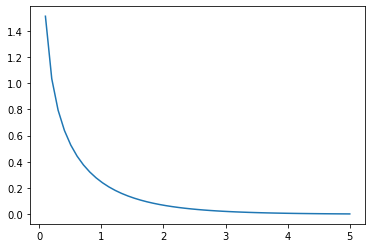

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

distribution = np.linspace(0, np.minimum(rv.dist.b, 5))
print("Distribution : \n", distribution)

plot = plt.plot(distribution, rv.pdf(distribution))

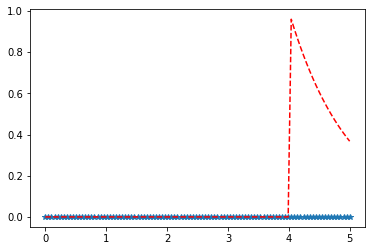

In [ ]:
#Variierende Positionsargumente 
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, 100)

# Varying positional arguments
y1 = erlang.pdf(x, 2, 6)
y2 = erlang.pdf(x, 1, 4)
plt.plot(x, y1, "*", x, y2, "r--")

# Polynomiale Regression

Die polynomiale Regression ist eine Form der linearen Regression, bei der die Beziehung zwischen der unabhängigen Variablen x und der abhängigen Variablen y als Polynom n-ten Grades modelliert wird. Die polynomielle Regression passt eine nichtlineare Beziehung zwischen dem Wert von x und dem entsprechenden bedingten Mittelwert von y an, bezeichnet als E(y |x)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

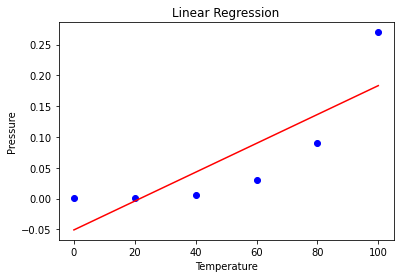

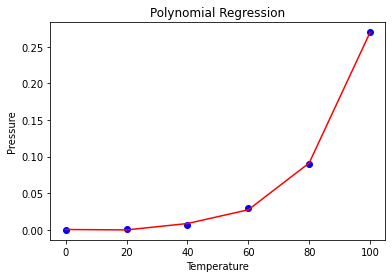

array([0.20675333])

In [ ]:
datas = pd.read_csv('/content/drive/MyDrive/Forecasting/datensätze/data.csv')

X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

lin = LinearRegression()

lin.fit(X, y)

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()


# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()


# Predicting a new result with Linear Regression after converting predict variable to 2D array
pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)


In [ ]:
# Predicting a new result with Polynomial Regression after converting predict variable to 2D array
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([0.43295877])

# Gompertz Funktion

Die nach ihrem Entdecker, dem britischen Mathematiker Benjamin Gompertz, benannte Gompertz-Funktion ist eine asymmetrische Sättigungsfunktion (Sigmoidfunktion), die sich im Gegensatz zur logistischen Funktion dadurch auszeichnet, dass sie sich ihrer rechten bzw. oberen Asymptote gemächlicher annähert als ihrer linken bzw. unteren, der Graph ihrer ersten Ableitung also ausgehend von deren Maximum bei ln(b)/c nach rechts hin langsamer abfällt als nach links

Parameters :

- q : lower and upper tail probability

- x : quantiles

- loc : [optional]location parameter. Default = 0

- scale : [optional]scale parameter. Default = 1

- size : [tuple of ints, optional] shape or random variates.

- moments : [optional] composed of letters [‘mvsk’]; ‘m’ = mean, ‘v’ = variance, ‘s’ = Fisher’s skew and ‘k’ = Fisher’s kurtosis. (default = ‘mv’).

Results : Gompertz (or truncated Gumbel) continuous random variable

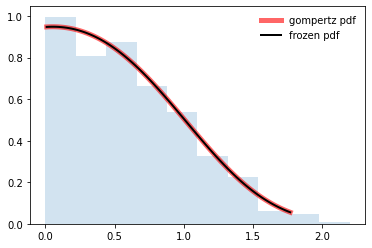

In [ ]:
from scipy.stats import gompertz
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
c = 0.947
mean, var, skew, kurt = gompertz.stats(c, moments='mvsk')

x = np.linspace(gompertz.ppf(0.01, c),
                gompertz.ppf(0.99, c), 100)
ax.plot(x, gompertz.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='gompertz pdf')

rv = gompertz(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = gompertz.ppf([0.001, 0.5, 0.999], c)


r = gompertz.rvs(c, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

# Facebook's Prophet 

Prophet folgt der Sklearn-Modell API. 

Input muss immer ein Dataframe mit zwei Spalten "ds" und "y" sein. 
- ds: Datastamp -- (bspw) Format: YYYY-MM-DD  
- y: Numerische Werte --> Stellt die Messung dar, die wir vorhersagen möchten


Es basiert auf einem zerlegbaren additiven Modell, bei dem nichtlineare Trends mit der Saisonalität übereinstimmen, und berücksichtigt auch die Auswirkungen von Feiertagen.

#### Warum sollten wir Facebooks Prophet benutzen?

- Wir brauchen es, denn obwohl das grundlegende zerlegbare additive Modell einfach aussieht, ist die Berechnung der darin enthaltenen Begriffe äußerst mathematisch und kann, wenn Sie nicht wissen, was Sie tun, zu falschen Vorhersagen führen, die schwerwiegende Auswirkungen auf die reale Welt haben können . Um diesen Prozess zu automatisieren, werden wir Prophet verwenden. 

https://de.acervolima.com/zeitreihenanalyse-mit-facebook-prophet/

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=365)
future.tail()

17:35:17 - cmdstanpy - INFO - Chain [1] start processing
17:35:19 - cmdstanpy - INFO - Chain [1] done processing


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208452,7.489430,8.902520
3266,2017-01-16,8.533442,7.787743,9.284015
3267,2017-01-17,8.320853,7.549990,9.012345
3268,2017-01-18,8.153517,7.403538,8.882272
3269,2017-01-19,8.165423,7.408449,8.898750


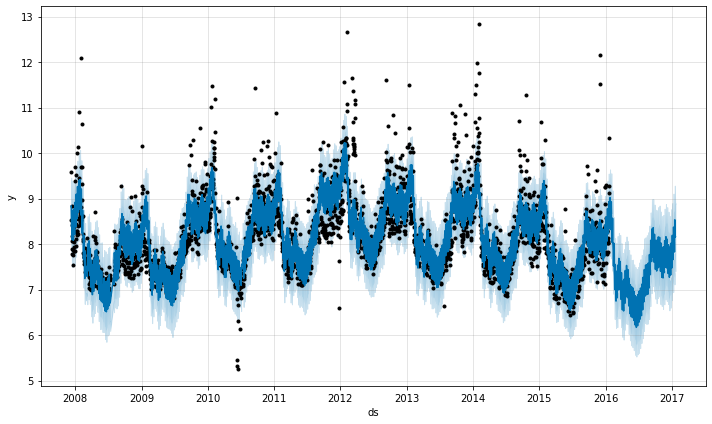

In [6]:
fig1 = m.plot(forecast)

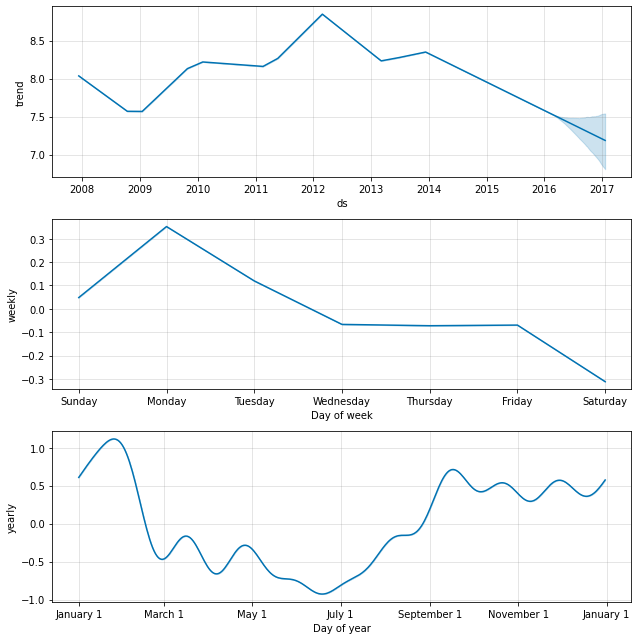

In [7]:
#Trend, Saisonalität ...
fig2 = m.plot_components(forecast)